# T-test

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_1samp,ttest_ind

## Pastries

A french cake shop claims that the average number of pastries they can produce in a day exceeds 500. The average number of pastries produced per day over a 70 day period was found to be 530. Assume that the population standard deviation for the pastries produced per day is 125. Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.

In [ ]:
# H0 : mu=500
# Ha : mu>500
alpha=0.05
z_stat=(530-500)/(125/np.sqrt(70))
p_value=1-norm.cdf(z_stat)
print(z_stat,p_value)
if p_value < alpha:
  print('reject H0')
else:
  print('do not reject H0')

2.007984063681781 0.022322492581293485
reject H0


In [ ]:
z_critical=norm.ppf(0.95) #critical z_value
z_critical

1.6448536269514722

In [ ]:
# what is critical sample mean?
x_critical=500+z_critical*125/np.sqrt(70)
x_critical

524.574701413748

In [ ]:
# if sample mean of 70 samples< 524.5 , then do not reject H0
# if sample mean of 70 samples > 524.5 , then reject H0

In [ ]:
1-norm.cdf((x_critical-500)/125/np.sqrt(70))

0.49062655321832116

In [ ]:
z=norm.ppf(0.95)
x=500+z*125/np.sqrt(70)
x

524.574701413748

In [ ]:
# what if sales average was 524.27
1-norm.cdf((524.574701413748-500)/(125/np.sqrt(70)))

0.050000000000000044

## improve IQ with a pill

In [ ]:
# population iq avg=100
# one researcher claims that he will improve IQ with his pills

In [ ]:
# The pill is given to a few people and their IQ is tested with following results:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [ ]:
np.mean(iq_scores)

103.5

In [ ]:
#Establish result at 99% confidence (0.01 significance "alpha")
#he we use t-test
#H0: mu=100(pill has no effect)
#Ha: mu>100(pill has good effect)

In [ ]:
t_stat,p_value=ttest_1samp(iq_scores,100)
print(t_stat)
print(p_value)

1.5071573172061195
0.1754994493585011


In [ ]:
alpha=0.01 # 99% confidence
if p_value<alpha:
  print('reject H0')
else:
  print('failed to reject H0')
  print('pill has no effect')

failed to reject H0
pill has no effect


In [ ]:
(103.5-100)/(pd.Series(iq_scores).std()/np.sqrt(8))

1.5071573172061195

## IQ across 2 schools

In [ ]:
df_iq=pd.read_csv('iq_two_schools.csv')
df_iq.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [ ]:
df_iq.groupby('School')['iq'].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

In [ ]:
iq_1=df_iq[df_iq['School']=='school_1']['iq']
iq_2=df_iq[df_iq['School']=='school_2']['iq']


In [ ]:
#H0: mu1=mu2
#Ha: mu1!=mu2
t_stat,p_value=ttest_ind(iq_1,iq_2)
print(p_value)
if p_value<0.05:
  print('reject H0')
else:
  print('failed to reject H0')


0.02004552710936217
reject H0


In [ ]:
#H0: mu1=mu2
#Ha: mu1!=mu2
t_stat,p_value=ttest_ind(iq_1,iq_2,alternative='greater')
print(p_value)
if p_value<0.05:
  print('reject H0')
else:
  print('failed to reject H0')

0.9899772364453189
failed to reject H0


In [ ]:
#H0: mu1=mu2
#Ha: mu1!=mu2
t_stat,p_value=ttest_ind(iq_1,iq_2,alternative='less')
print(p_value)
if p_value<0.05:
  print('reject H0')
else:
  print('failed to reject H0')

0.010022763554681085
reject H0


## cricket

In [ ]:
df=pd.read_csv('Sachin_ODI.csv')
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


###  Batting pattern in first and second innings

In [ ]:
df.groupby('Inns')['runs'].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [ ]:
df_1st_inns=df[df['Inns']==1]
df_2nd_inns=df[df['Inns']==2]


In [ ]:
# H0: mu1 = mu2 (first and second inns essentially the same)
# Ha: mu1 > mu2 (first inngs avg is significantly more)
alpha = 0.05
t_stat,p_value=ttest_ind(df_1st_inns['runs'],df_2nd_inns['runs'],alternative='greater')
print(p_value)
if p_value<alpha:
  print('reject H0')
  print('first inngs avg is significantly more')
else:
  print('failed to reject H0')
  print('first and second inns essentially the same')

0.07241862097379981
failed to reject H0
first and second inns essentially the same


In [ ]:
### Victory Vs Defeat

In [ ]:
df.groupby('Won')['runs'].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [ ]:
df_won=df[df['Won']==True]
df_lost=df[df['Won']==False]

In [ ]:
# H0: mu1 = mu2 (same batting pattern)
# Ha: mu1 > mu2 (better scores in won matches)
alpha = 0.05
t_stat,p_value=ttest_ind(df_won['runs'],df_lost['runs'],alternative='greater')
print(p_value)
if p_value<alpha:
  print('reject H0')
  print('better scores in won matches')
else:
  print('failed to reject H0')
  print('same batting pattern')

0.00016353077486826558
reject H0
better scores in won matches


## Aerofit

In [ ]:
df_aerofit=pd.read_csv('aerofit.csv')
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='Gender', ylabel='Income'>

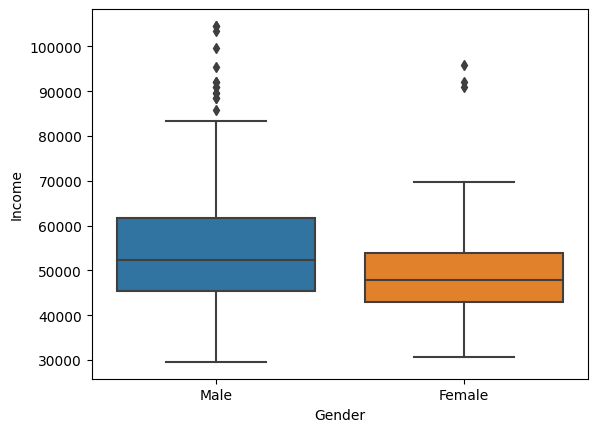

In [ ]:
sns.boxplot(x='Gender',y='Income',data=df_aerofit)

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
income_male=df_aerofit[df_aerofit['Gender']=='Male']['Income']
income_female=df_aerofit[df_aerofit['Gender']=='Female']['Income']

In [ ]:
income_male.mean()

56562.75961538462

In [ ]:
income_female.mean()

49828.90789473684

In [ ]:
# H0: same income
# Ha: men having greater income
alpha=0.05
t_stat,p_value=ttest_ind(income_male,income_female,alternative='greater')
print(p_value)
if p_value<alpha:
  print('reject H0')
  print('men having greater income')
else:
  print('failed to reject H0')
  print('same income')

0.003263631548607129
reject H0
men having greater income


# Chi-squared Test

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chisquare #statistical test(chi_stat,p_value)
from scipy.stats import chi2_contingency #when expected values has to be computed

from scipy.stats import chi2 #distribution

## coin toss

In [ ]:
# H0: coin is fair
# Ha: coin is biased
alpha=0.05
chi_stat,p_value=chisquare([28,22] ,#observed heads ans tails,
                             [25,25],#expected heads and tails under H0
                           )
print(chi_stat)
print(p_value)
if p_value<alpha:
  print('reject H0')
  print('coin is biased')
else:
  print('failed to reject H0')
  print('coin is fair')

0.72
0.3961439091520741
failed to reject H0
coin is fair


In [ ]:
(28-25)**2/25 + (22-25)**2/25

0.72

In [ ]:
1-chi2.cdf(0.72,df=1)

0.3961439091520741

In [ ]:
# H0: coin is fair
# Ha: coin is biased
alpha=0.05
chi_stat,p_value=chisquare([45,5] ,#observed heads ans tails,
                             [25,25],#expected heads and tails under H0
                           )
print(chi_stat)
print(p_value)
if p_value<alpha:
  print('reject H0')
  print('coin is biased')
else:
  print('failed to reject H0')
  print('coin is fair')

32.0
1.5417257900280013e-08
reject H0
coin is biased


In [ ]:
(45-25)**2/25 + (5-25)**2/25

32.0

In [ ]:
1-chi2.cdf(32.0,df=1)

1.5417257914762672e-08

In [ ]:
#critical X2 stat for 5% significance
chi2.ppf(0.95,df=1)

3.841458820694124

In [ ]:
# any value for X2 greater than 3.84 we reject H0

## Gender Vs Preference(online/offline)

In [ ]:
# H0: gender and preference are independent
# Ha: gender and preference are dependent

observed=[
          [527,72],
          [206,102]
]
chi_stat,p_value,df,expected_values=chi2_contingency(observed) # gives chi_stat,p_value,df,expected_values

In [ ]:
chi_stat

57.04098674049609

In [ ]:
p_value

4.268230756875865e-14

In [ ]:
df

1

In [ ]:
expected_values

array([[484.08710033, 114.91289967],
       [248.91289967,  59.08710033]])

In [ ]:
if p_value<alpha:
  print('reject H0')
  print('gender and preference are dependent')
else:
  print('failed to reject H0')
  print('gender and preference are independent')

reject H0
gender and preference are dependent


## aerofit

In [ ]:
df_aerofit=pd.read_csv('aerofit.csv')

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
gender_product=pd.crosstab(index=df_aerofit['Gender'],columns=df_aerofit['Product'])
gender_product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [ ]:
# H0: gender and preference are independent
# Ha: gender and preference are dependent

alpha=0.05
chi_stat,p_value,df,expected_values=chi2_contingency(gender_product)
print(chi_stat,p_value,df,expected_values)
if p_value<alpha:
  print('reject H0')
  print('gender and preference are dependent')
else:
  print('failed to reject H0')
  print('gender and preference are independent')

12.923836032388664 0.0015617972833158714 2 [[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]
reject H0
gender and preference are dependent


In [ ]:
alpha=0.05
observed=[
      [75,106,46],
      [106,161,61],
      [98,183,52],
      [48,102,14]

]
chi_stat,p_value,df,expected_values=chi2_contingency(observed)
print(chi_stat,p_value,df,expected_values)
if p_value<alpha:
  print('reject H0')
  print('gender and preference are dependent')
else:
  print('failed to reject H0')
  print('gender and preference are independent')

15.727554171801787 0.015293451318673136 6 [[ 70.55988593 119.11026616  37.32984791]
 [101.95437262 172.10646388  53.9391635 ]
 [103.50855513 174.73003802  54.76140684]
 [ 50.97718631  86.05323194  26.96958175]]
reject H0
gender and preference are dependent


# ANOVA test

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway,kruskal #numeric Vs categorical for many categories
from scipy.stats import ttest_ind #numeric Vs categorical
from scipy.stats import shapiro #test for gaussian (50 to 200 samples)
from scipy.stats import levene #test for variance
from statsmodels.graphics.gofplots import qqplot

## aerofit

In [ ]:
df_aerofit=pd.read_csv('aerofit.csv')

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df_aerofit['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<Axes: xlabel='Product', ylabel='Income'>

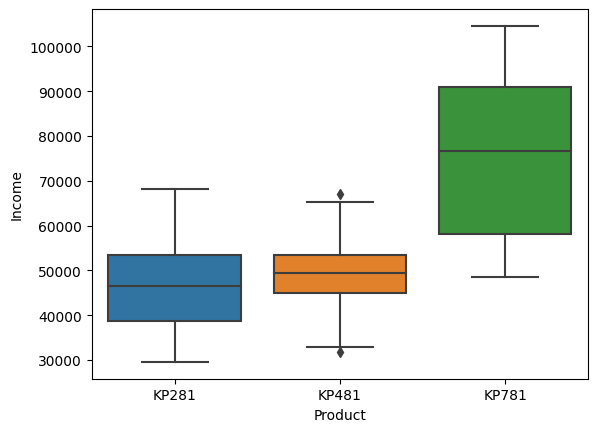

In [ ]:
sns.boxplot(x=df_aerofit['Product'],y=df_aerofit['Income'])

In [ ]:
df_aerofit['random_group']=np.random.choice(['g1','g2','g3'],size=len(df_aerofit))
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g3
1,KP281,19,Male,15,Single,2,3,31836,75,g2
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g1
4,KP281,20,Male,13,Partnered,4,2,35247,47,g3


<Axes: xlabel='random_group', ylabel='Income'>

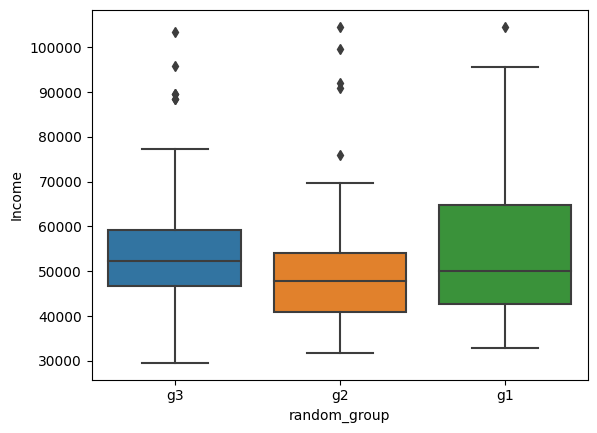

In [ ]:
sns.boxplot(x='random_group',y='Income',data=df_aerofit)

In [ ]:
income_g1=df_aerofit[df_aerofit['random_group']=='g1']['Income']
income_g2=df_aerofit[df_aerofit['random_group']=='g2']['Income']
income_g3=df_aerofit[df_aerofit['random_group']=='g3']['Income']

In [ ]:
income_g1.mean()

55496.346153846156

In [ ]:
income_g2.mean()

50689.0

In [ ]:
income_g3.mean()

55235.49230769231

In [ ]:
# H0: all groups have same mean
# Ha: one or more groups have different mean
alpha=0.05
f_stat,p_value=f_oneway(income_g1,income_g2,income_g3)
print(p_value)
if p_value<alpha:
  print('reject H0')
  print('one or more groups have different mean')
else:
  print('failed to reject H0')
  print('all groups have same mean')

0.19517883159329819
failed to reject H0
all groups have same mean


<Axes: xlabel='Product', ylabel='Income'>

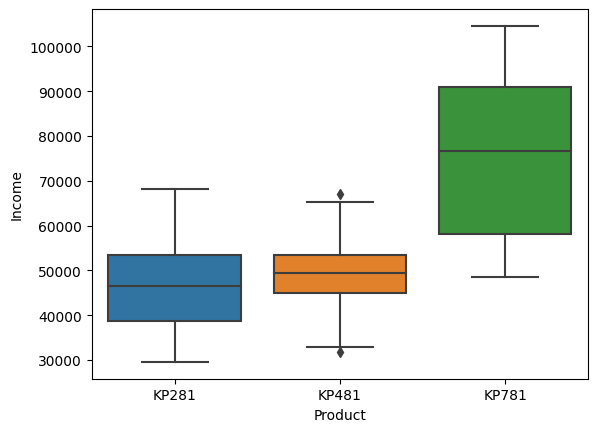

In [ ]:
sns.boxplot(x=df_aerofit['Product'],y=df_aerofit['Income'])

In [ ]:
income_KP281=df_aerofit[df_aerofit['Product']=='KP281']['Income']
income_KP481=df_aerofit[df_aerofit['Product']=='KP481']['Income']
income_KP781=df_aerofit[df_aerofit['Product']=='KP781']['Income']

In [ ]:
income_KP281.mean()

46418.025

In [ ]:
income_KP481.mean()

48973.65

In [ ]:
income_KP781.mean()

75441.575

In [ ]:
# H0: all groups have same mean
# Ha: one or more groups have different mean
alpha=0.05
f_stat,p_value=f_oneway(income_KP281,income_KP481,income_KP781)
print(p_value)
if p_value<alpha:
  print('reject H0')
  print('one or more groups have different mean')
else:
  print('failed to reject H0')
  print('all groups have same mean')

1.5644991316342494e-27
reject H0
one or more groups have different mean


In [ ]:
# try pairwise ttest for fun
# H0: two means are same
t_stat,p_value=ttest_ind(income_KP281,income_KP481)
if p_value<0.05:
  print('reject H0')
else:
  print('failed to reject H0')

failed to reject


In [ ]:
# try pairwise ttest for fun
# H0: two means are same
t_stat,p_value=ttest_ind(income_KP481,income_KP781)
if p_value<0.05:
  print('reject H0')
else:
  print('failed to reject H0')

reject H0


In [ ]:
# try pairwise ttest for fun
# H0: two means are same
t_stat,p_value=ttest_ind(income_KP281,income_KP781)
if p_value<0.05:
  print('reject H0')
else:
  print('failed to reject H0')

reject H0


## assumptions of ANOVA

1.Gaussian
2.independent
3.equal variance

In [ ]:
#if aasumptions of ANOVA fails use kruskal
kruskal(income_KP281,income_KP481,income_KP781)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

In [ ]:
kruskal(income_g1,income_g2,income_g3)

KruskalResult(statistic=4.54665058553686, pvalue=0.10296920739611405)

In [ ]:
df_hw=pd.read_csv('weight-height.csv')
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
Height=df_hw['Height']
Height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [ ]:
Weight=df_hw['Weight']
Weight.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

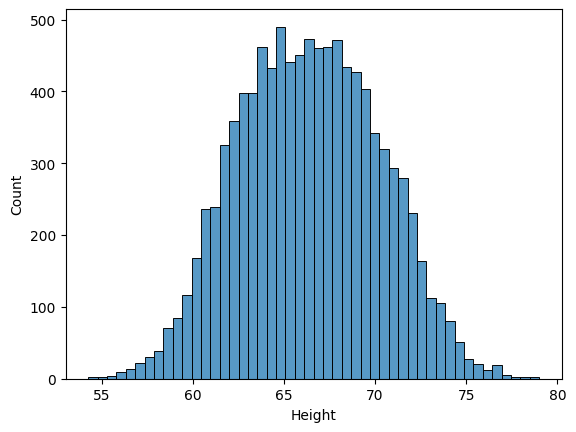

In [ ]:
sns.histplot(Height)

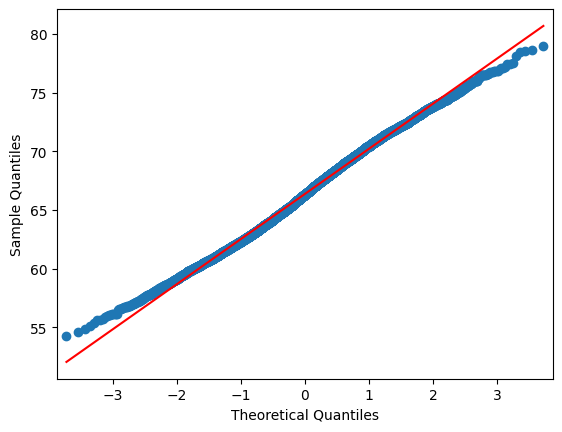

In [ ]:
qqplot(Height,line='s')
plt.show()

In [ ]:
df_wt=pd.read_csv('waiting_time.csv')
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: xlabel='time', ylabel='Count'>

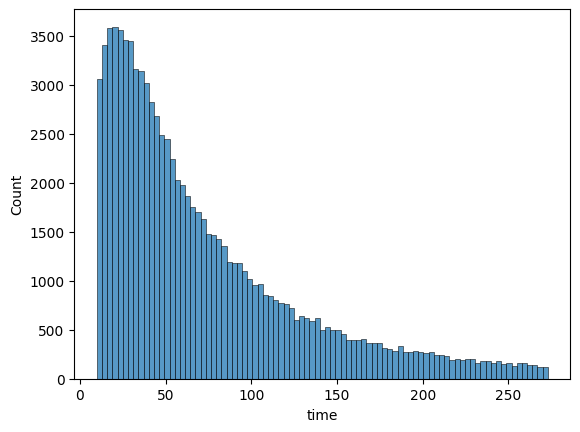

In [ ]:
sns.histplot(df_wt['time'])

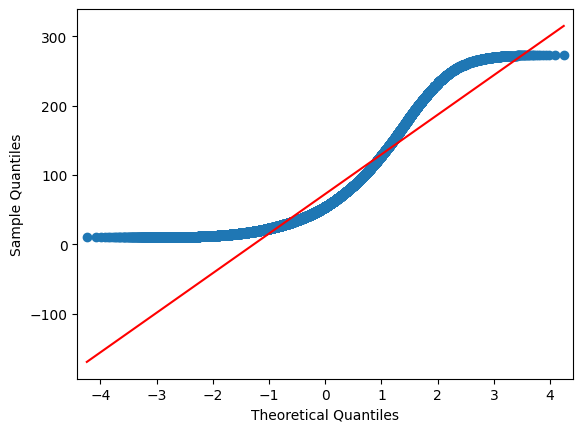

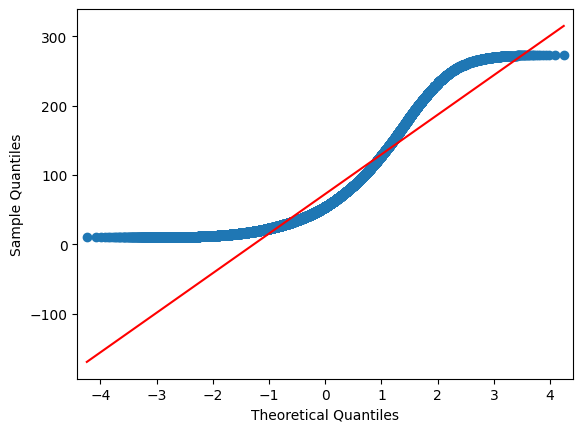

In [ ]:
qqplot(df_wt['time'],line='s')

## shapiro test for Gaussian

In [ ]:
# take a few samples of data(50 to 200) this test may not work if data is too large

In [ ]:
height_subset=Height.sample(100)

In [ ]:
# H0: data is gaussian
# Ha: data is not gaussian
test_stat,p_value=shapiro(height_subset)
print(p_value)
if p_value<0.05:
  print('reject H0')
  print('data is not gaussian')
else:
  print('failed to reject H0')
  print('data is gaussian')

0.14577175676822662
failed to reject H0
data is gaussian


<Axes: xlabel='Height', ylabel='Count'>

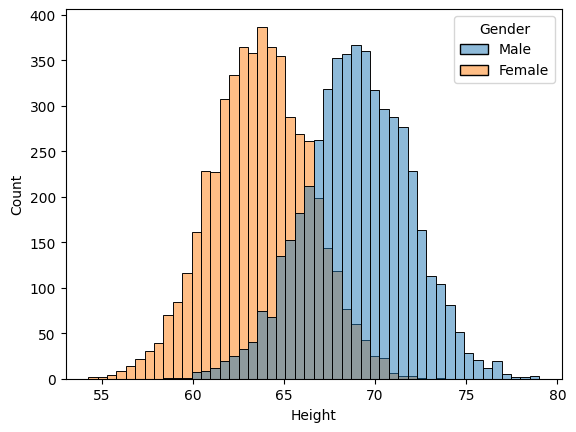

In [ ]:
sns.histplot(data=df_hw,x='Height',hue='Gender')

In [ ]:
height_men=df_hw[df_hw['Gender']=='Male']['Height']
height_women=df_hw[df_hw['Gender']=='Female']['Height']

In [ ]:
height_men.mean()

69.02634590621741

In [ ]:
height_women.mean()

63.70877360342507

In [ ]:
ttest_ind(height_men,height_women)

TtestResult(statistic=95.60271449148823, pvalue=0.0, df=9998.0)

In [ ]:
height_men.var()

8.198843252520467

In [ ]:
height_women.var()

7.2699474936701245

In [ ]:
# to establish whether this this difference we see in variance is by-chance or significant we will use levene test
# H0: variances are equal
# Ha: variances are not equal
levene_stat,p_value=levene(height_men,height_women)
if p_value<0.05:
  print('variances are not equal')


variances are not equal


In [ ]:
# H0: all groups have same mean
# Ha: one or more groups have different mean
alpha=0.07
college_students = [71, 62, 63, 59, 67, 68, 63, 62, 66, 65, 61, 60]
athletes = [67, 68, 72, 66, 65, 69, 71, 70, 65, 64, 68]
army = [68, 67, 66, 68, 69, 70, 71, 69, 66, 67]
f_stat,p_value=f_oneway(college_students,athletes,army)
print(p_value)
if p_value<alpha:
  print('reject H0')
  print('one or more groups have different mean')
else:
  print('failed to reject H0')
  print('all groups have same mean')
  # try pairwise ttest for fun
# H0: two means are same
t_stat,p_value=ttest_ind(A,D)
print(p_value)
if p_value<0.05:
  print('reject H0')
else:
  print('failed to reject H0')

0.0017534092082519943
reject H0
one or more groups have different mean
3.271164766368406e-05
reject H0


# correlation test

In [ ]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr

[90 11 54  3 80  9 16 52 23 57 58 88 97 26 28 91 17 40  8 44]

[103.30008158  14.03173602  26.58951643  -7.85481663  80.32119383
  11.26357329  10.22493449  53.46689006   8.46460724  49.44414168
  54.44705085  85.56400347 108.27805301  35.74064368  35.17197208
  82.23258487  28.04086994  56.95236319   3.83946033  36.61863093]


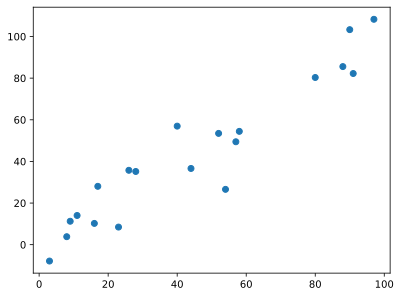

In [ ]:
x=np.random.randint(low=0,high=100,size=20)
print(x)

print()

y=x+np.random.normal(3,10,len(x))
print(y)

plt.scatter(x,y)
plt.show()

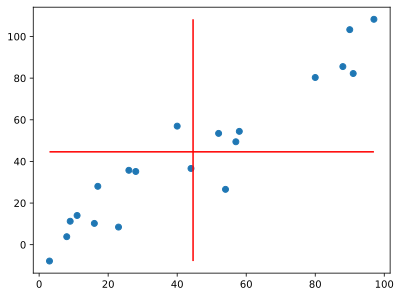

In [ ]:
plt.scatter(x,y)
plt.vlines(x.mean(),y.min(),y.max(),color='r')
plt.hlines(x.mean(),x.min(),x.max(),color='r')
plt.show()

In [ ]:
np.corrcoef(x,y)

array([[1.        , 0.94896244],
       [0.94896244, 1.        ]])

In [ ]:
np.corrcoef(x,y)[0,1]

0.9489624359026891

## perfect linear

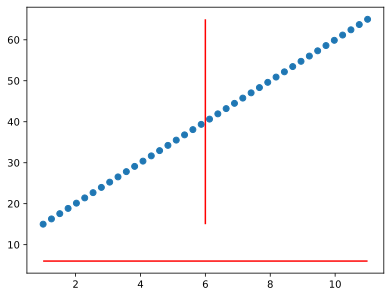

In [ ]:
x=np.linspace(1,11,40)
y=5*x+10
plt.scatter(x,y)
plt.vlines(x.mean(),y.min(),y.max(),color='r')
plt.hlines(x.mean(),x.min(),x.max(),color='r')
plt.show()

In [ ]:
np.corrcoef(x,y)[0,1] #pearson correlation

1.0

## Salary vs Year's of experience

In [ ]:
data = [(1.0, 4), (4.0, 5), (6.0, 7), (9.0, 9), (11.0, 12), (12.0, 15), (13.0, 17), (14.0, 18), (15.0, 28), (15.5, 32)]

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,0,1
0,1.0,4
1,4.0,5
2,6.0,7
3,9.0,9
4,11.0,12
5,12.0,15
6,13.0,17
7,14.0,18
8,15.0,28
9,15.5,32


In [ ]:
df.columns=['x','y']

In [ ]:
df

,x,y
0,1.0,4
1,4.0,5
2,6.0,7
3,9.0,9
4,11.0,12
5,12.0,15
6,13.0,17
7,14.0,18
8,15.0,28
9,15.5,32


In [ ]:
df.x.mean(),df.y.mean()

(10.05, 14.7)

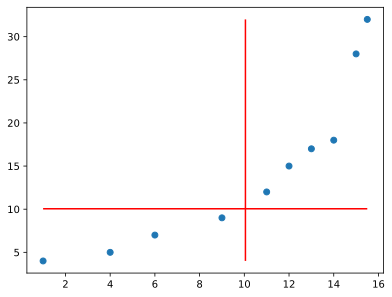

In [ ]:
plt.scatter(df.x,df.y)
plt.vlines(df.x.mean(),df.y.min(),df.y.max(),color='r')
plt.hlines(df.x.mean(),df.x.min(),df.x.max(),color='r')
plt.show()

In [ ]:
np.corrcoef(df.x,df.y)[0,1]

0.8850072528845457

In [ ]:
## pearson: strength of linear relationship
## spearman: strength of monotomic relationship

## spearman

In [ ]:
df.columns=['years','salary']
df

,years,salary
0,1.0,4
1,4.0,5
2,6.0,7
3,9.0,9
4,11.0,12
5,12.0,15
6,13.0,17
7,14.0,18
8,15.0,28
9,15.5,32


In [ ]:
df['rank_years']=pd.Series.rank(df.years)
df['rank_salary']=pd.Series.rank(df.salary)

In [ ]:
df

,years,salary,rank_years,rank_salary
0,1.0,4,1.0,1.0
1,4.0,5,2.0,2.0
2,6.0,7,3.0,3.0
3,9.0,9,4.0,4.0
4,11.0,12,5.0,5.0
5,12.0,15,6.0,6.0
6,13.0,17,7.0,7.0
7,14.0,18,8.0,8.0
8,15.0,28,9.0,9.0
9,15.5,32,10.0,10.0


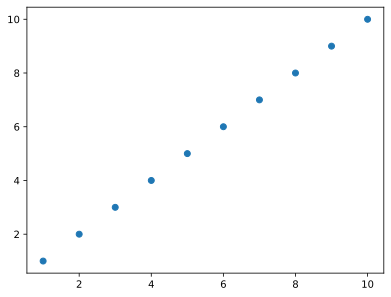

In [ ]:
plt.scatter(df.rank_years,df.rank_salary)

In [ ]:
np.corrcoef(df.rank_years,df.rank_salary)[0,1]

0.9999999999999999

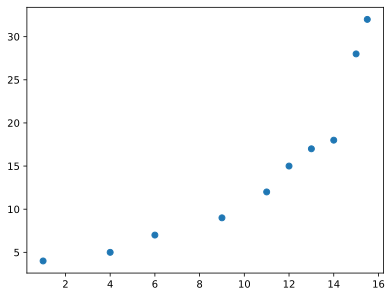

In [ ]:
plt.scatter(df.years,df.salary)

In [ ]:
spearmanr(df.years,df.salary)[0]

0.9999999999999999

# advanced distributions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [ ]:
#p[x=0]
np.exp(-3)


0.049787068367863944

In [ ]:
poisson.pmf(mu=3,k=0)

0.049787068367863944

In [ ]:
#p[x=1]
3*np.exp(-3)

0.14936120510359183

In [ ]:
poisson.pmf(mu=3,k=1)

0.14936120510359185

In [ ]:
#p[x<=1]- probability of observing less than 1 or equal to 1 accidents next day
#p[x<=1]=p[x=0]+p[x=1]


In [ ]:
#p[x=0]+p[x=1]=
poisson.pmf(mu=3,k=0)+poisson.pmf(mu=3,k=1)

0.1991482734714558

In [ ]:
#p[x=0]+p[x=1]=
poisson.cdf(mu=3,k=1)

0.1991482734714558

In [ ]:
#p[x<=7]
poisson.cdf(mu=3,k=7)

0.9880954961436426

In [ ]:
import math

In [ ]:
3**100

515377520732011331036461129765621272702107522001

In [ ]:
((3**100)*np.exp(-3))/math.factorial(100)

2.7494028058340025e-112

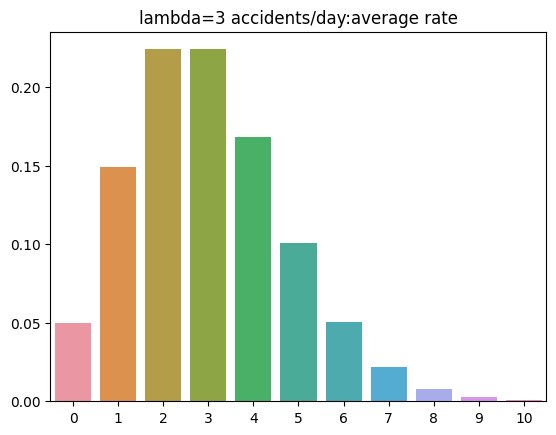

In [ ]:
X_values=np.arange(0,11)
X_values
y_values=[]
for k in x_values:
  y=poisson.pmf(mu=3,k=k)
  y_values.append(np.round(y,4))

#y_values
sns.barplot(x=X_values,y=y_values)
plt.title('lambda=3 accidents/day:average rate')
plt.show()

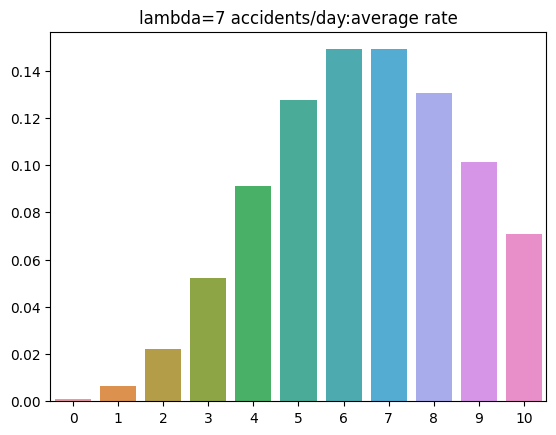

In [ ]:
X_values=np.arange(0,11)
X_values
y_values=[]
for k in x_values:
  y=poisson.pmf(mu=7,k=k)
  y_values.append(np.round(y,4))

#y_values
sns.barplot(x=X_values,y=y_values)
plt.title('lambda=7 accidents/day:average rate')
plt.show()

ValueError: Grouper and axis must be same length

# Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task: Determine the eligibility for granting Home loan. Objective of this case study is: 1.   To understand the patterns in the data. 2.   How to Handle the categorical features. 3. How to deal with missing data. 4. Feature Engineering 5. Finding the most important features while taking the decision of granting a loan application. 6. Understanding the Normalization and standardisation of the data.

In [ ]:
data=pd.read_csv('loan.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
tdf=pd.DataFrame({'Feature1':[1,2,3],
                 'Feature2':[4,5,6]})
tdf

,Feature1,Feature2
0,1,4
1,2,5
2,3,6


In [ ]:
tdf.Feature1

0    1
1    2
2    3
Name: Feature1, dtype: int64

In [ ]:
tdf['Feature1']

0    1
1    2
2    3
Name: Feature1, dtype: int64

In [ ]:
tdf['Feature2']

0    4
1    5
2    6
Name: Feature2, dtype: int64

In [ ]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## analyzing missing values

In [ ]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
cat_columns=list(data.dtypes[data.dtypes=='object'].index)
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
cat_columns.remove('Loan_Status')

In [ ]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
target='Loan_Status'

In [ ]:
num_columns=list(data.dtypes[data.dtypes!='object'].index)
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
# analysis of target variable

In [ ]:
data.shape

(614, 12)

In [ ]:
data[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# P[randomly select a person , chances his loan will be rejected]

In [ ]:
422/(422+192)

0.6872964169381107

In [ ]:
data[target].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [ ]:
## Approval Rate ~ 69%, 40%, 56%, 10%
## Rejection Rate ~ 31%

In [ ]:
target

'Loan_Status'

<Axes: xlabel='Loan_Status', ylabel='count'>

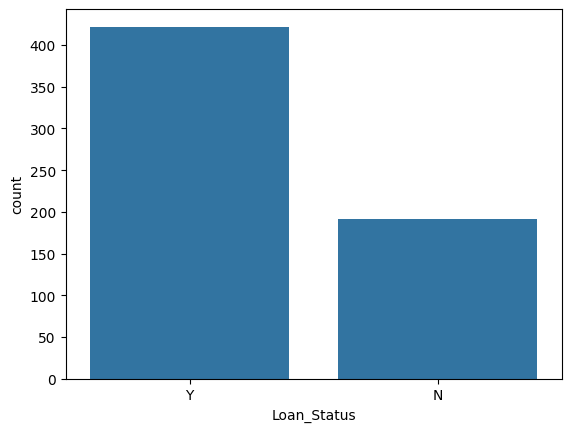

In [ ]:
# let's see it visually
sns.countplot(data=data,x=target)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


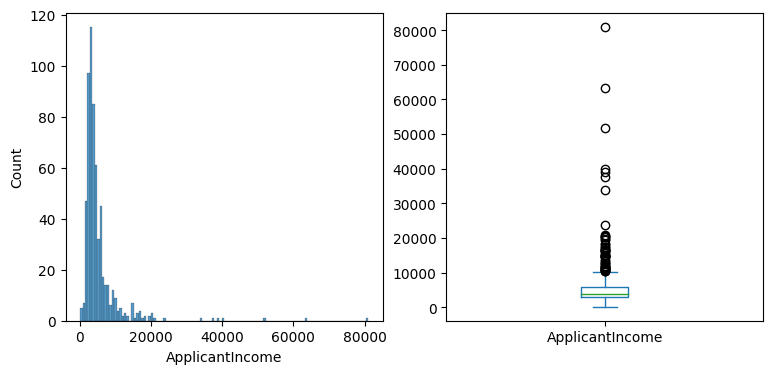

In [ ]:
# income of the applicant
plt.subplot(121)
sns.histplot(data['ApplicantIncome'])

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(9,4))
#sns.boxplot(data['ApplicantIncome'],figsize=(9,4))
plt.show()

In [ ]:
data[['ApplicantIncome','Loan_Status']]

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y
...,...,...
609,2900,Y
610,4106,Y
611,8072,Y
612,7583,Y


In [ ]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [ ]:
# the difference between means above is it significant to conclude that loan status depends upon applicant income

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
data[data[target]=='N']['ApplicantIncome']
data[data[target]=='Y']['ApplicantIncome']

0      5849
2      3000
3      2583
4      6000
5      5417
       ... 
608    3232
609    2900
610    4106
611    8072
612    7583
Name: ApplicantIncome, Length: 422, dtype: int64

In [ ]:
## H0 : means are same,  ApplicantIncome is bad predictor of loan_status
## HA : means are diff, ApplicantIncome is good predictor of loan_status
alpha = 0.05
t_stat,p_value=ttest_ind(data[data[target]=='N']['ApplicantIncome']
                        ,data[data[target]=='Y']['ApplicantIncome'])
print(p_value)

if(p_value<alpha):
  print('Reject H0: ", "means are diff, ApplicantIncome is good predictor of loan_status')
else:
  print('Failed to reject H0,means are diff, ApplicantIncome is good predictor of loan_status')

0.907287812130518
Failed to reject H0,means are diff, ApplicantIncome is good predictor of loan_status


In [ ]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
def feture_selection_ttest(data=data,col_name='ApplicantIncome'):
  alpha = 0.05
  t_stat,p_value=ttest_ind(data[data[target]=='N']['ApplicantIncome']
                        ,data[data[target]=='Y']['ApplicantIncome'])
  print(p_value)

  if(p_value<alpha):
    print(f'{col_name} is good predictor of loan_status, Reject H0:')
  else:
    print(f'{col_name} is good predictor of loan_status,Failed to reject H0')




In [ ]:
feture_selection_ttest(col_name='ApplicantIncome')

0.907287812130518
ApplicantIncome is good predictor of loan_status,Failed to reject H0


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data['Credit_History'].value_counts() #categorical variable

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
pd.crosstab(data['Credit_History'],data[target])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
pd.crosstab(data['Credit_History'],data[target],normalize='index')

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


In [ ]:
from scipy.stats import chi2_contingency #chisquare

In [ ]:
# H0 : Credit_History is a bad perdictor of loan_status
# HA : Credit_History is a good perdictor of loan_status

alpha=0.05
_,p_value,_,_=chi2_contingency(pd.crosstab(data['Credit_History'],data[target]))
print(np.round(p_value))

# p_value <<<<< alpha
# Reject H0; Credit_History is a good perdictor of loan_status

0.0


In [ ]:
pd.crosstab(data['Gender'],data[target])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
def feature_selection_chi2_test(data=data,col_name='Gender'):
  alpha=0.05
  _,p_value,_,_=chi2_contingency(pd.crosstab(data[col_name],data[target]))
  print(p_value)

  if p_value<alpha:
    print(f'{col_name} is a good predictor of loan status')
  else:
    print(f'{col_name} is a bad predictor of loan status')

In [ ]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
feature_selection_chi2_test(col_name='Gender')

0.7086529816451106
Gender is a bad predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Married')

0.03439381301579988
Married is a good predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Dependents')

0.3678506740863211
Dependents is a bad predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Education')

0.04309962129357355
Education is a good predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Self_Employed')

1.0
Self_Employed is a bad predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Property_Area')

0.0021360187811644937
Property_Area is a good predictor of loan status


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:

feture_selection_ttest(col_name='ApplicantIncome')

0.907287812130518
ApplicantIncome is good predictor of loan_status,Failed to reject H0


In [ ]:

feture_selection_ttest(col_name='CoapplicantIncome')

0.907287812130518
CoapplicantIncome is good predictor of loan_status,Failed to reject H0


## Create New Features

In [ ]:
data['total income']=data['ApplicantIncome']+data['CoapplicantIncome']

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
feture_selection_ttest(col_name='total income')

0.907287812130518
total income is good predictor of loan_status,Failed to reject H0


In [ ]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data['Loan_Amount_Term']=(data['Loan_Amount_Term']/12)

In [ ]:
data['Loan_Amount_Term'].value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0


In [ ]:
data['loan_amount_per_year']=(data['LoanAmount']/data['Loan_Amount_Term'])

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000


In [ ]:
data['EMI']=(data['loan_amount_per_year']*1000)/12 #EMI

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667


In [ ]:
(data['total income']*0.3 > data['EMI']).astype(int)

0      0
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Length: 614, dtype: int64

In [ ]:
data['able_to_pay_EMI']=(data['total income']*0.3 > data['EMI']).astype(int)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [ ]:
pd.crosstab(data['Loan_Status'],data['able_to_pay_EMI'])

able_to_pay_EMI,0,1
Loan_Status,,
N,19,173
Y,21,401


In [ ]:
  feature_selection_chi2_test(col_name='able_to_pay_EMI')

0.03455011506195388
able_to_pay_EMI is a good predictor of loan status


## missing values analysis

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [ ]:
data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
total income             0
loan_amount_per_year    36
EMI                     36
able_to_pay_EMI          0
dtype: int64

In [ ]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
data['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [ ]:
data['Credit_History']=data['Credit_History'].fillna(2)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [ ]:
data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Self_Employed']=data['Self_Employed'].fillna('other')

In [ ]:
data.Self_Employed.unique()

array(['No', 'Yes', 'other'], dtype=object)

## for numerical features

In [ ]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
data[num_columns].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
dtype: int64

In [ ]:
# median imputation for numerical columns

from sklearn.impute import SimpleImputer

In [ ]:
si=SimpleImputer(strategy='median')

In [ ]:
# fits- identifies the median
# transform - replaces the missing values with median

In [ ]:
vals=pd.DataFrame([10, 20, 10, 15, 17, 18, 21, np.nan])
vals

,0
0,10.0
1,20.0
2,10.0
3,15.0
4,17.0
5,18.0
6,21.0
7,NaN


In [ ]:
np.median([10, 20, 10, 15, 17, 18, 21]) #manually

17.0

In [ ]:
vals[0]

0    10.0
1    20.0
2    10.0
3    15.0
4    17.0
5    18.0
6    21.0
7     NaN
Name: 0, dtype: float64

In [ ]:
si.fit_transform(vals)

array([[10.],
       [20.],
       [10.],
       [15.],
       [17.],
       [18.],
       [21.],
       [17.]])

In [ ]:
data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History           0
Property_Area            0
Loan_Status              0
total income             0
loan_amount_per_year    36
EMI                     36
able_to_pay_EMI          0
dtype: int64

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [ ]:
num_missing=['EMI', 'loan_amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

median_imputer=SimpleImputer(strategy='median')

for col in num_missing:
  data[col]=pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
# pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data["EMI"])))

In [ ]:
data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
total income             0
loan_amount_per_year     0
EMI                      0
able_to_pay_EMI          0
dtype: int64

In [ ]:
# highest imputation for some categorical columns

In [ ]:
cat_missing=['Gender','Married','Dependents']
freq_imputer=SimpleImputer(strategy='most_frequent')

for col in cat_missing:
  data[col]=pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
data.isnull().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
total income            0
loan_amount_per_year    0
EMI                     0
able_to_pay_EMI         0
dtype: int64

In [ ]:
# data["Total_Income"].fillna(np.median(data["Total_Income"]))

In [ ]:
data.dtypes

Gender                   object
Married                  object
Dependents               object
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area            object
Loan_Status              object
total income            float64
loan_amount_per_year    float64
EMI                     float64
able_to_pay_EMI           int64
dtype: object

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
data.loc[data['Dependents']=='3+','Dependents']=3

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', 3], dtype=object)

In [ ]:
data['Dependents']=data['Dependents'].astype(int)

In [ ]:
s=(data.dtypes=='object')
object_cols=list(s[s].index)
object_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
# loan status
col='Loan_Status'
data[col].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
data[col]

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

## Label Encoding

In [ ]:
from sklearn.preprocessing  import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
data[col]=label_encoder.fit_transform(data[col])

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,5849.0,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,1,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,1,6000.0,4.700000,391.666667,1


In [ ]:
tdf=pd.DataFrame({'a':['low','medium']})
tdf

,a
0,low
1,medium


In [ ]:
tdf['b']=tdf[a].map({'low':0,'medium':1})